This notebook generates the figures for Chapter 3: Preprocessing from Poldrack, Mumford, and Nichols' _Handbook of fMRI Data Analysis (2nd Edition)_

In [29]:
import os,sys
from wand.image import Image as WImage
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import nilearn.plotting
%matplotlib inline
import nibabel
from nipype.interfaces import fsl

from nipype.caching import Memory
# use nipype's caching mechanism to save the results of the processing
mem = Memory(base_dir='.')

# set up rpy2 so we can use R magic
%load_ext rpy2.ipython

datadir=os.getenv('FMRIBOOKDATA')
if not datadir:
    raise Exception('You need to set the environment variable FMRIBOOKDATA')
else:
    print 'using base dir:',datadir
sys.path.append('../../utils')

from get_data import get_data
data=get_data()

orig_figuredir='https://web.stanford.edu/group/poldracklab/fmri-handbook-2e-data/figures-1e/'

figuredir=os.path.join(datadir,'../../figures')
if not os.path.exists(figuredir):
    os.mkdir(figuredir)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
using base dir: /Users/poldrack/data_unsynced/fmri-handbook-2e-data


__Figure 3.1__: Use original manually generated version

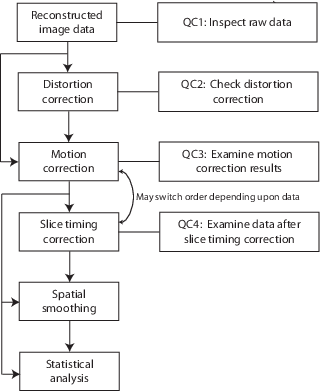

In [2]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_1.pdf'))

__Figure 3.2__: Use original manually generated version

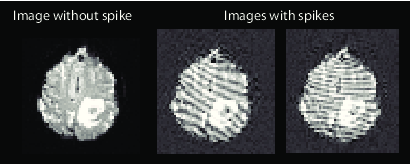

In [3]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_2.pdf'))

__Figure 3.3__: Use original manually generated version

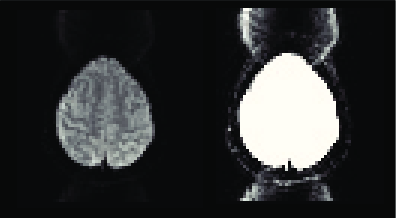

In [4]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_3.pdf'))

__Figure 3.4__: Example of ICA component map and timecourse

(575, 750, 3)
(3289, 850, 3)


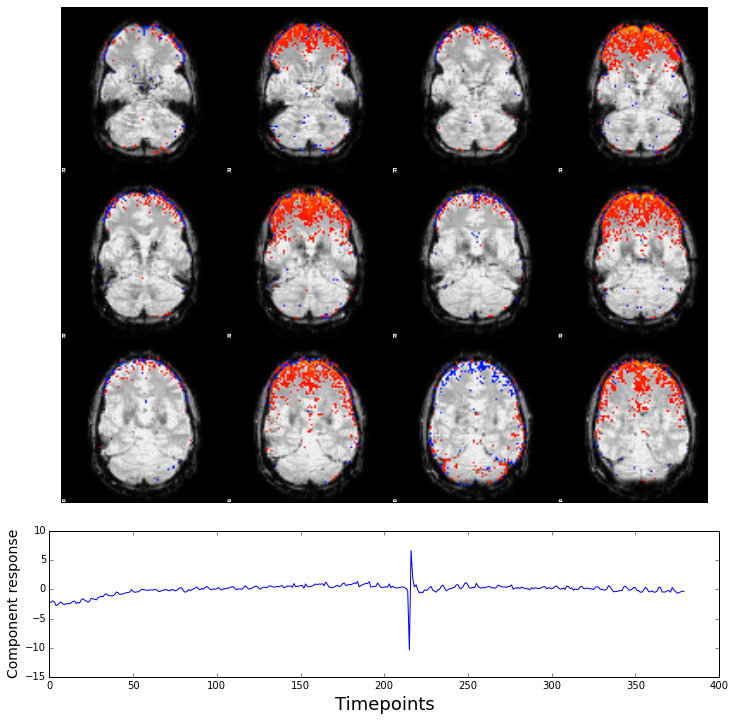

In [5]:
# use image from melodic since it looks better than the nilearn stats maps
import matplotlib
melodic_mix=numpy.loadtxt(os.path.join(data['func_ica'],'melodic_mix'))
fig=plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=3)
component_img=matplotlib.image.imread(os.path.join(data['func_ica'],'report/IC_11_thresh.png'))
cropped_img=numpy.squeeze(component_img[1175:1750,:750,:])
print cropped_img.shape
print component_img.shape
plt.imshow(cropped_img)
plt.xticks([])
plt.yticks([])

ax1 = plt.subplot2grid((4,1), (3,0))
plt.plot(melodic_mix[:,10])
plt.xlabel('Timepoints',fontsize=18)
plt.ylabel('Component response',fontsize=14)
plt.savefig(os.path.join(figuredir,'Figure_3_4.svg'),format='svg',dpi=1200)

__Figure 3.5__: Use original manually generated version

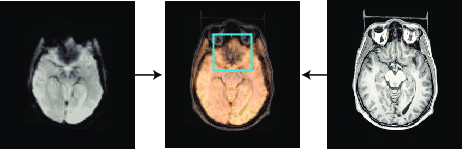

In [6]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_5.pdf'))

__Figure 3.6__: Use original manually generated version - the code below shows how to make a similar image for our dataset but the distortion is much less here so we will use the original example in the book. Also, our data don't come with a wrapped phase image, just a phase difference.

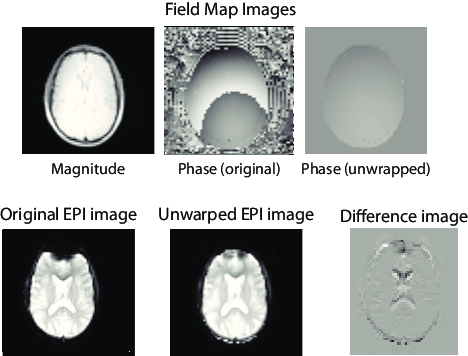

In [7]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_6.pdf'))

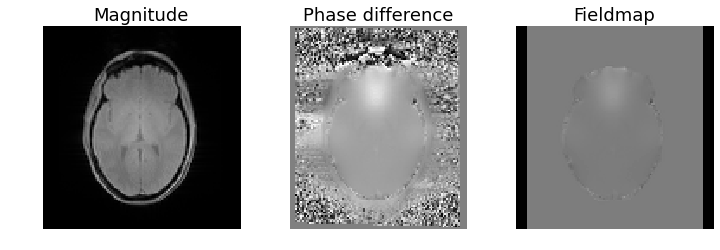

In [25]:
fig=plt.figure(figsize=(12,8))

cutcoord=[30]
mag_img=nibabel.load(data['fieldmap-mag'])
phasediff=nibabel.load(data['fieldmap-phasediff'])
fmap=nibabel.load(data['fieldmap'])

ax1 = plt.subplot2grid((2,3), (0,0))
nilearn.plotting.plot_anat(nilearn.image.index_img(mag_img,0),
                           display_mode='z',cut_coords=[30],axes=ax1,
                          annotate=False)
plt.title('Magnitude',fontsize=18)
ax2 = plt.subplot2grid((2,3), (0,1))
nilearn.plotting.plot_anat(phasediff,display_mode='z',
                           cut_coords=[30],axes=ax2,
                          annotate=False)
plt.title('Phase difference',fontsize=18)
ax3 = plt.subplot2grid((2,3), (0,2))
nilearn.plotting.plot_anat(nilearn.image.index_img(fmap,0),display_mode='z',
                           cut_coords=[30],axes=ax3,
                          annotate=False)
plt.title('Fieldmap',fontsize=18)


__Figure 3.7__: Use original manually generated version

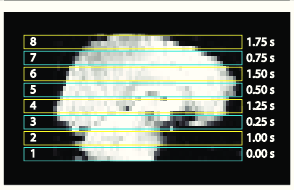

In [9]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_7.pdf'))

__Figure 3.8__: Example of effects of slice timing on HRF

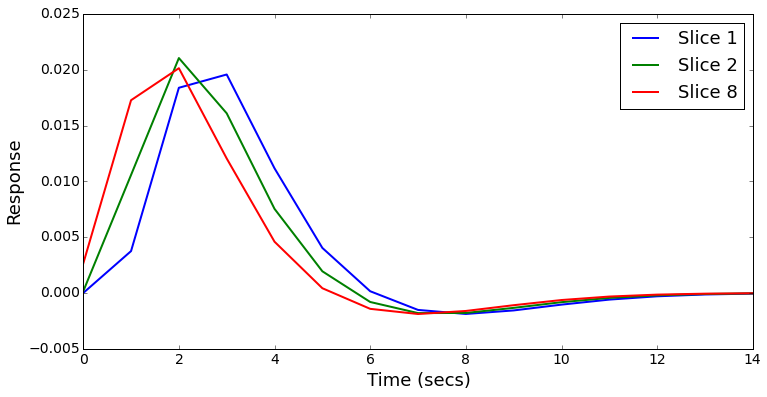

In [10]:
from nipy.modalities.fmri.hemodynamic_models import spm_hrf
tr=0.1
hrf=spm_hrf(tr,oversampling=1)

plt.figure(figsize=(12,6))
plt.plot(hrf[range(0,300,20)],linewidth=2)
plt.plot(hrf[range(9,300,20)],linewidth=2)
plt.plot(hrf[range(18,300,20)],linewidth=2)
plt.legend(['Slice 1','Slice 2 ','Slice 8'],fontsize=18)
plt.xlabel('Time (secs)',fontsize=18)
plt.ylabel('Response',fontsize=18)
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(os.path.join(figuredir,'Figure_3_8.svg'),format='svg',dpi=1200)

__Figure 3.9__: Depiction of slice timing correction

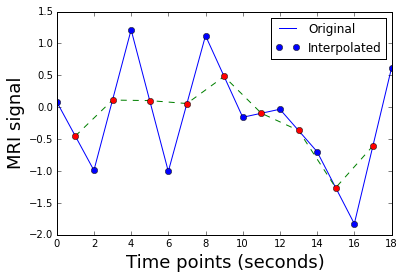

In [17]:
from statsmodels.tsa.arima_process import arma_generate_sample
# generate AR1 data
t1=arma_generate_sample([1.,0.41],[1,0.0],10)

plt.plot(range(0,20,2),t1)
plt.plot(range(0,20,2),t1,'bo')

interp_data=(t1[1:] + t1[:-1])/2.
plt.plot(range(1,19,2),interp_data,'--')
plt.plot(range(1,19,2),interp_data,'ro')
plt.ylabel('MRI signal',fontsize=18)
plt.xlabel('Time points (seconds)',fontsize=18)
plt.legend(['Original','Interpolated'])


In [12]:
# might have to try the previous a few times to find one that doesn't overrun the legend
# once you do, save it
plt.savefig(os.path.join(figuredir,'Figure_3_9.svg'),format='svg',dpi=1200)

__Figure 3.10__: Use original manually generated version

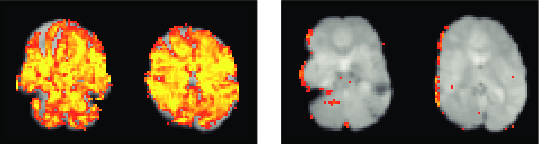

In [13]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_10.pdf'))

__Figure 3.11__: Use original manually generated version

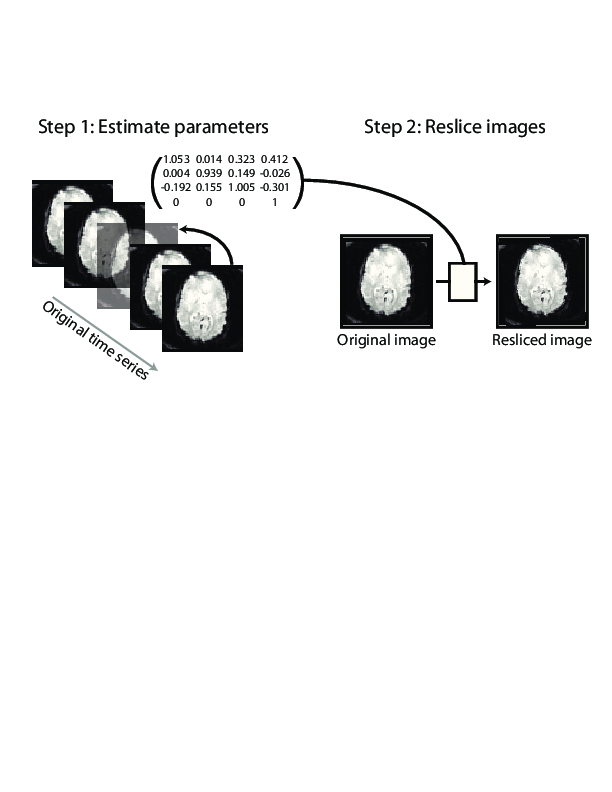

In [14]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_11.pdf'))

__Figure 3.12__: Effects of motion correction. __TBD:__ Add various metrics from fsl_motion_outliers into the plot

INFO:workflow:Executing node 0b17430b74513509c6cbd3fb83a11c57 in dir: /Users/poldrack/Dropbox/code/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/0b17430b74513509c6cbd3fb83a11c57
INFO:workflow:Collecting precomputed outputs



mat_file = <undefined>
mean_img = /Users/poldrack/Dropbox/code/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/0b17430b74513509c6cbd3fb83a11c57/sub00001_ses014_task002_run001_bold_mcf_mcf.nii.gz_mean_reg.nii.gz
out_file = /Users/poldrack/Dropbox/code/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/0b17430b74513509c6cbd3fb83a11c57/sub00001_ses014_task002_run001_bold_mcf_mcf.nii.gz
par_file = /Users/poldrack/Dropbox/code/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/0b17430b74513509c6cbd3fb83a11c57/sub00001_ses014_task002_run001_bold_mcf_mcf.nii.gz.par
rms_files = <undefined>
std_img = <undefined>
variance_img = <undefined>



[0, 380, -0.0065399730000000001, 0.0065399730000000001]

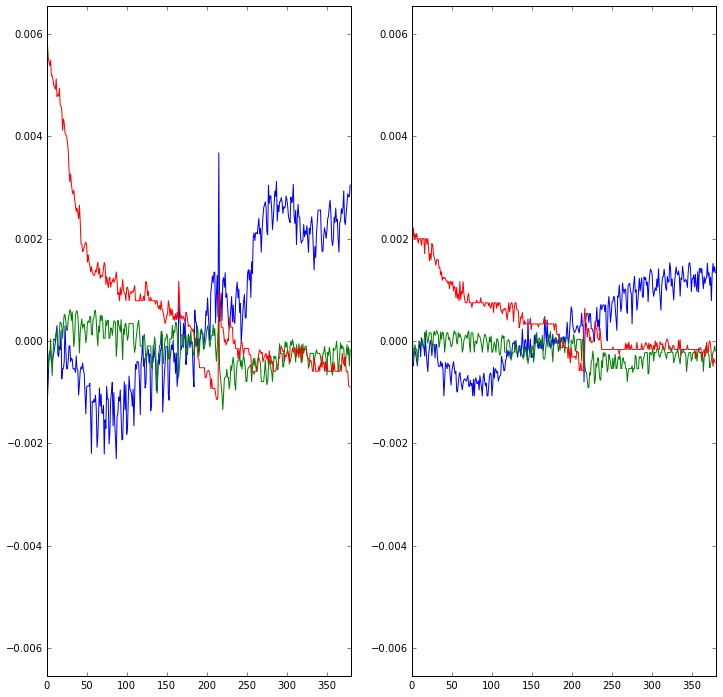

In [36]:
# First need to rerun motion correction on the already-corrected data 
mcflirt = mem.cache(fsl.MCFLIRT)
mcflirt_results = mcflirt(in_file=data['func_motcorr'],
                          save_plots=True,
                          mean_vol=True)
print mcflirt_results.outputs
motion_params_orig=numpy.loadtxt(data['motionpar'])
motion_params_rerun=numpy.loadtxt(mcflirt_results.outputs.par_file)
disp_orig=motion_params_orig[1:,:3]-motion_params_orig[:-1,:3]
disp_rerun=motion_params_rerun[1:,:3]-motion_params_rerun[:-1,:3]

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(motion_params_orig[:,:3])
maxabsmot=numpy.max(numpy.abs(motion_params_orig[:,:3]))
plt.axis([0,motion_params_orig.shape[0],-1.1*maxabsmot,1.1*maxabsmot])
plt.subplot(1,2,2)
plt.plot(motion_params_rerun[:,:3])
plt.axis([0,motion_params_orig.shape[0],-1.1*maxabsmot,1.1*maxabsmot])
plt.subplot(1,2,3)


__Figure 3.13__: Aliasing example

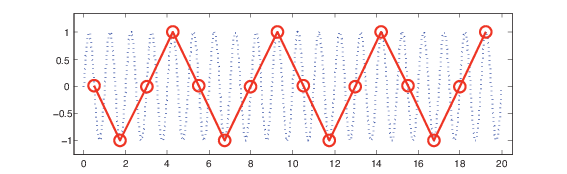

In [37]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_13.pdf'))

(19999,)
(19999,)


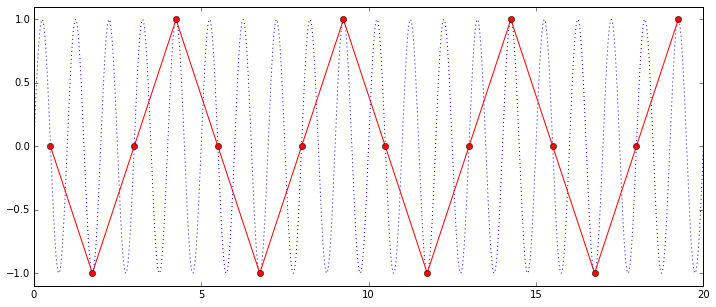

In [57]:
samp_rate=1000
signal_freq=1.25 # hz
ncycles=20
x=numpy.arange(0,ncycles*2.*numpy.pi,numpy.pi/(samp_rate/2.))
x=x[:samp_rate*ncycles]
sin_x=numpy.sin(x)

x_time=numpy.arange(1/float(samp_rate),ncycles,1/float(samp_rate))
sin_x=sin_x[:len(x_time)]


resample_2hz=numpy.arange(500,len(sin_x),signal_freq*samp_rate).astype('int')

sin_x_resample_2hz=sin_x[resample_2hz]
plt.figure(figsize=(12,5))
plt.plot(x_time,sin_x,'b:')
plt.plot(x_time[resample_2hz],sin_x_resample_2hz,'ro-')
plt.axis([0,numpy.max(x_time),-1.1,1.1])
print sin_x.shape
print x_time.shape
plt.savefig(os.path.join(figuredir,'Figure_3_13.svg'),format='svg',dpi=1200)

__Figure 3.14__: Use original version

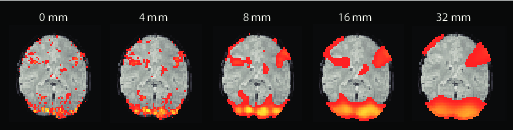

In [59]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_14.pdf'))